<a href="https://colab.research.google.com/github/yuliacandradewi/Pejuang_Data_3/blob/main/Mini_Project_Kelas_Dasar_Yulia_Candra_Dewi_2000015039.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Penjualan Produk AmazonTerbaik Berdasarkan Rating, dan Jumlah Ulasan



##Latar Belakang Dataset

Amazon adalah perusahaan teknologi multinasional Amerika yang berbasis di Seattle, Washington, yang berfokus pada e-commerce, komputasi awan, streaming digital, dan kecerdasan buatan. Perusahaan ini awalnya merupakan pasar online untuk buku, tetapi kemudian diperluas untuk menjual barang elektronik, perangkat lunak, video game, pakaian, furnitur, makanan, mainan, dan perhiasan.Saat ini Amazon menjadi perusahaan swasta terbesar kedua di Amerika Serikat dan salah satu perusahaan paling bernilai di dunia.

Dataset ***Amazon Best Seller June 2021 Products*** ini menyajikan kategori produk yang dijual oleh Amazon, kemudian kode unik produk, link produk, jumlah penjual disetiap kategori produk, peringkat produk, rating produk, jumlah ulasan, dan harga produk.

Dataset ini dibuat untuk membantu perusahan menemukan produk dengan penjualan terbaik (Best Seller) pada Juni 2021. Oleh karena itu, kali ini saya akan mencoba melakukan EDA, Data Preparation, dan Data visualization untuk menemukan penjualan terbaik Rating dan Jumlah Ulasan. 

### Pertanyaan Analisis

1. Kategori produk mana yang mempunyai Rating paling tinggi dan paling rendah dilihat dari rata-ratanya? 
2. Kategori produk mana yang mendapatkan Jumlah Ulasan (Reviews Count) paling banyak dan paling sedikit dilihat dari rata-ratanya? 
3. Kategori produk mana yang mempunyai harga (Price) paling mahal dan paling murah dilihat dari rata-ratanya? 

### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

### Mengakses dataset

In [2]:
df = pd.read_csv('/Amazon_Best_Seller_2021_June.csv')
df.head()

,ASIN,Category,Product Link,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1 Sellers,#1,4.7,"640,721",$39.99
1,B07FZ8S74R,Electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1 Sellers,#2,4.7,"854,114",$34.99
2,B07XJ8C8F5,Electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1 Sellers,#3,4.7,"267,821",$44.99
3,B07WVFCVJN,Electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27 Sellers,#4,4.8,"114,267",$28.48
4,B08YT2N5SX,Electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1 Sellers,#5,4.7,"267,821",$49.99


### Memahami Data
1. ASIN	= Kode unik produk
2. Category	= Kategori produk
3. Product Link	= Link produk
4. No of Sellers = Jumlah penjual di setiap daftar produk
5. Rank	= Peringkat produk
6. Rating	= Rating produk
7. Reviews Count	= Jumlah total ulasan pada suatu produk
8. Price = Harga produk


##EDA (Exploratory Data Analysis)

### Dimensi Data

In [3]:
df.shape

(707, 8)

### Variabel Pada Dataset

In [4]:
df.columns.values 

array(['ASIN', 'Category', 'Product Link', 'No of Sellers', 'Rank',
       'Rating', 'Reviews Count', 'Price'], dtype=object)

In [5]:
df.Category.unique()

array(['Electronics', 'Clothing, Shoes & Jewelry', 'Gift Cards', 'Books',
       'Video Games', 'Camera & Photo', 'Toys & Games'], dtype=object)

In [6]:
df.dtypes

ASIN              object
Category          object
Product Link      object
No of Sellers     object
Rank              object
Rating           float64
Reviews Count     object
Price             object
dtype: object

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ASIN           707 non-null    object 
 1   Category       707 non-null    object 
 2   Product Link   707 non-null    object 
 3   No of Sellers  707 non-null    object 
 4   Rank           707 non-null    object 
 5   Rating         707 non-null    float64
 6   Reviews Count  707 non-null    object 
 7   Price          707 non-null    object 
dtypes: float64(1), object(7)
memory usage: 44.3+ KB


### Mengecek Missing Data

In [8]:
df.isnull().sum()

ASIN             0
Category         0
Product Link     0
No of Sellers    0
Rank             0
Rating           0
Reviews Count    0
Price            0
dtype: int64

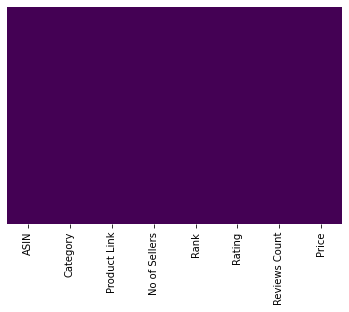

In [9]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Memperbarui data dengan mengubah tipe data agar tidak terjadi error saat Plot Distribusi Data Numerik dan Pairplot

In [10]:
# Mengubah tipe data yang ada pada kolom 'No of Sellers' dari string menjadi integer, dengan menghapus kata ' Sellers'
df['No of Sellers']=df['No of Sellers'].str.rstrip(' Sellers')
df['No of Sellers']=df['No of Sellers'].astype('int64')
# Mengubah tipe data yang ada pada kolom 'Rank' dari string menjadi integer, dengan menghapus simbol '#'
df.Rank=df.Rank.str.lstrip("#")
df.Rank=df.Rank.astype("int64")
# Mengubah tipe data yang ada pada kolom 'Reviews Count' dari string menjadi integer, dengan menghapus tanda koma ','
df['Reviews Count']=df['Reviews Count'].str.replace(',', '')
df['Reviews Count']=df['Reviews Count'].astype('int64')
# Mengubah tipe data yang ada pada kolom 'Price' dari string menjadi float, dengan menghapus simbol '$'
df.Price=df.Price.str.lstrip("$")
df.Price=df.Price.astype("float64")
# Menampilkan data telah diperbarui
df.head()

,ASIN,Category,Product Link,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1,1,4.7,640721,39.99
1,B07FZ8S74R,Electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1,2,4.7,854114,34.99
2,B07XJ8C8F5,Electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1,3,4.7,267821,44.99
3,B07WVFCVJN,Electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27,4,4.8,114267,28.48
4,B08YT2N5SX,Electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1,5,4.7,267821,49.99


### Mengecek informasi data yang telah diperbarui

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ASIN           707 non-null    object 
 1   Category       707 non-null    object 
 2   Product Link   707 non-null    object 
 3   No of Sellers  707 non-null    int64  
 4   Rank           707 non-null    int64  
 5   Rating         707 non-null    float64
 6   Reviews Count  707 non-null    int64  
 7   Price          707 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 44.3+ KB


### Mengecek missing data yang telah diperbarui

In [12]:
df.isnull().sum()

ASIN             0
Category         0
Product Link     0
No of Sellers    0
Rank             0
Rating           0
Reviews Count    0
Price            0
dtype: int64

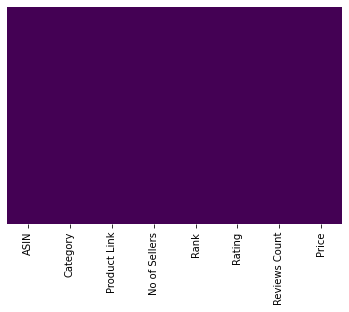

In [13]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Mengecek Outlier

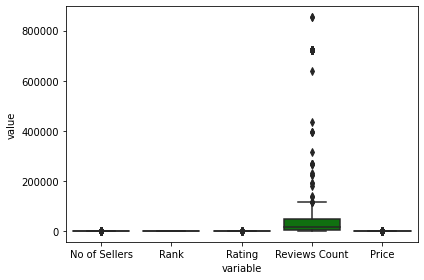

In [14]:
df1=df.select_dtypes(include=['int64','float64'])

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

### Melihat Korelasi Data

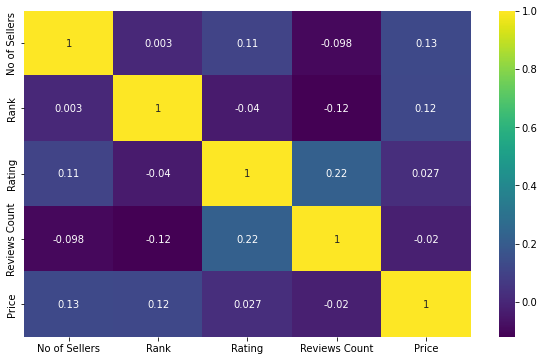

In [15]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

### Melihat Statistik Data

In [16]:
df.describe()

,No of Sellers,Rank,Rating,Reviews Count,Price
count,707.000000,707.000000,707.000000,707.000000,707.000000
mean,8.333805,51.356436,4.593494,77005.942008,55.686351
std,20.699360,28.661702,0.284117,178407.465321,88.580862
min,1.000000,1.000000,1.400000,1.000000,0.880000
25%,1.000000,27.000000,4.500000,5138.000000,13.990000
50%,1.000000,52.000000,4.700000,18023.000000,25.990000
75%,5.000000,75.500000,4.800000,49593.500000,50.000000
max,214.000000,100.000000,5.000000,854114.000000,899.000000


### Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

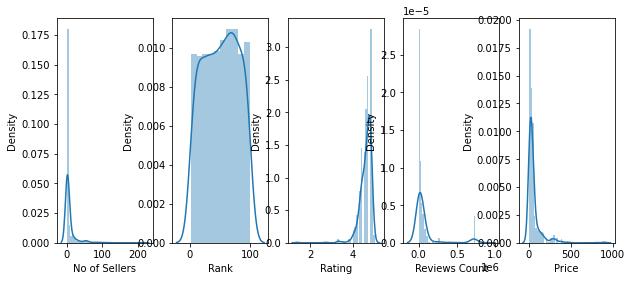

In [17]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

### Pairplot

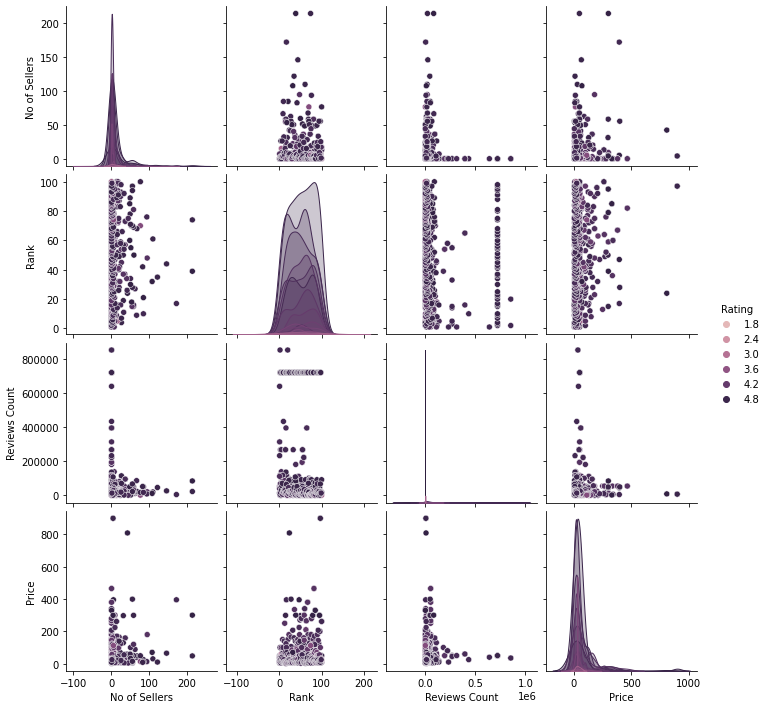

In [18]:
g = sns.pairplot(df1, hue="Rating")

##Data Preparation

### Membuat data frame untuk visualisasi yang akan menjawab pertanyaan pertama

In [19]:
df_2=pd.DataFrame(df.groupby('Category')['Rating'].mean()).reset_index().sort_values(by='Rating', ascending=False).reset_index().drop('index',axis=1)
df_2

,Category,Rating
0,Gift Cards,4.807000
1,Books,4.674286
2,Toys & Games,4.650526
3,Video Games,4.626316
4,Electronics,4.617007
5,"Clothing, Shoes & Jewelry",4.473000
6,Camera & Photo,4.324000


### Membuat data frame untuk visualisasi yang akan menjawab pertanyaan kedua

In [20]:
df_3=pd.DataFrame(df.groupby('Category')['Reviews Count'].mean()).reset_index().sort_values(by='Reviews Count', ascending=False).reset_index().drop('index',axis=1)
df_3

,Category,Reviews Count
0,Gift Cards,334867.690000
1,Electronics,76938.115646
2,"Clothing, Shoes & Jewelry",28685.540000
3,Video Games,26978.526316
4,Books,25899.400000
5,Toys & Games,17687.400000
6,Camera & Photo,7217.540000


### Membuat data frame untuk visualisasi yang akan menjawab pertanyaan ketiga

In [21]:
df_4=df.groupby('Category')['Price'].mean()
df_4=pd.DataFrame(df_4)
df_4=df_4.reset_index()
df_4

,Category,Price
0,Books,11.495286
1,Camera & Photo,50.630800
2,"Clothing, Shoes & Jewelry",17.608700
3,Electronics,135.425034
4,Gift Cards,44.007400
5,Toys & Games,17.256105
6,Video Games,60.990316


## Data Visualization

###1. Kategori produk mana yang mempunyai Rating paling tinggi dan paling rendah dilihat dari rata-ratanya?

In [22]:
# Visualisasi dengan diagram batang
px.bar(y='Rating', x='Category', data_frame=df_2, color='Category', title= 'Rata-Rata Rating Setiap Kategori')

Dilihat dari rata-ratanya, Rating paling tinggi didapatkan oleh kategori Kartu Hadiah (Gift Card), sedangkan paling rendah didapatkan oleh kategori Kamera & Foto (Camera & Photo).

###2. Kategori produk mana yang mendapatkan Jumlah Ulasan (Reviews Count) paling banyak dan paling sedikit dilihat dari rata-ratanya? 

In [23]:
# Visualisasi dengan diagram batang
px.bar(y='Reviews Count', x='Category', data_frame=df_3, title= 'Rata-Rata Jumlah Ulasan Setiap Kategori')

Dilihat dari rata-ratanya, Jumlah Ulasan paling banyak diterima oleh Kartu Hadiah (Gift Card), sedangkan Jumlah Ulasan paling sedikit diterima oleh Kamera & Foto (Camera & Photo).

###3. Kategori produk mana yang mempunyai harga (Price) paling mahal dan paling murah dilihat dari rata-ratanya? 

In [24]:
# Visualisasi dengan diagram lingkaran
px.pie(df_4,names=df_4.Category,values=df_4.Price, title= 'Presentase Rata-Rata Harga Setiap Kategori')

Dilihat dari presentase rata-ratanya, Harga paling mahal adalah kategori elektronik (Electronics), sedangkan Harga paling murah adalah Buku (Books).